In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import re
sns.set()
from datetime import datetime 
from dateutil import parser
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import seaborn; seaborn.set()
import matplotlib
from matplotlib import font_manager, rc
import platform
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False   

## Association Rule

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [96]:
merge = pd.read_csv('data/resource.csv')

In [97]:
merge

,Unnamed: 0,Unnamed: 0.1,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,average_temperature,precipitation(mm),datetime,year_month
0,0,0,1,1931,b,2016-06-01,13:31,0,경기,한식음식점업,1071.428571,22.7,0.0,2016-06-01 13:31:00,2016-06
1,1,1,1,1932,h,2016-06-01,14:18,0,경기,한식음식점업,428.571429,22.7,0.0,2016-06-01 14:18:00,2016-06
2,2,2,1,1933,c,2016-06-01,15:07,0,경기,한식음식점업,1142.857143,22.7,0.0,2016-06-01 15:07:00,2016-06
3,3,3,1,1934,g,2016-06-01,15:12,0,경기,한식음식점업,1142.857143,22.7,0.0,2016-06-01 15:12:00,2016-06
4,4,4,1,1935,a,2016-06-01,16:06,0,경기,한식음식점업,1071.428571,22.7,0.0,2016-06-01 16:06:00,2016-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404331,6554814,6556455,2136,4663854,f,2019-02-28,23:03,0,제주,주점,3928.571429,10.4,0.1,2019-02-28 23:03:00,2019-02
6404332,6554817,6556458,2136,4663855,d,2019-02-28,23:24,0,제주,주점,4142.857143,10.4,0.1,2019-02-28 23:24:00,2019-02
6404333,6554818,6556459,2136,4663489,a,2019-02-28,23:24,0,제주,주점,4500.000000,10.4,0.1,2019-02-28 23:24:00,2019-02
6404334,6554819,6556460,2136,4663856,d,2019-02-28,23:27,0,제주,주점,571.428571,10.4,0.1,2019-02-28 23:27:00,2019-02


### 필요없는 열 삭제 해주기

In [98]:
merge.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1 , inplace = True)

In [99]:
merge.drop(['datetime', 'year_month'], axis = 1 , inplace = True)

### 계절 열을 생성해주기

In [100]:
merge.set_index('transacted_date', inplace = True)

In [101]:
merge.index = pd.to_datetime(merge.index)

In [102]:
merge['Season'] = merge.index.strftime('%m')

In [103]:
merge['Season'] = merge['Season'].astype('int')

In [104]:
def encode_unit(x):
    if x >= 3 and x <= 5:
        return '봄'
    elif x >= 6 and x <= 8:
        return '여름'
    elif x >= 9 and x <= 10:
        return '가을'
    else:
        return '겨울'

In [105]:
new_s = pd.DataFrame(merge['Season'])

In [106]:
new_s = new_s.applymap(encode_unit)
merge['Season'] = new_s['Season']

In [107]:
merge.reset_index(inplace = True)

In [108]:
merge.columns

Index(['transacted_date', 'store_id', 'card_id', 'card_company',
       'transacted_time', 'installment_term', 'region', 'type_of_business',
       'amount', 'average_temperature', 'precipitation(mm)', 'Season'],
      dtype='object')

In [109]:
new = merge.groupby(['type_of_business','Season']).aggregate({ 'average_temperature': 'mean','precipitation(mm)':'mean',"amount": 'sum'}).reset_index()
new

,type_of_business,Season,average_temperature,precipitation(mm),amount
0,가정용품,가을,18.517843,2.662912,8.520731e+07
1,가정용품,겨울,1.359117,0.889916,1.832772e+08
2,가정용품,봄,13.190411,2.372825,9.668692e+07
3,가정용품,여름,25.783179,5.755167,1.291017e+08
4,간이음식,가을,18.647475,3.179960,4.101191e+08
...,...,...,...,...,...
119,학원,여름,25.489786,5.734564,1.809733e+09
120,한식음식점업,가을,18.372245,3.827452,2.771008e+09
121,한식음식점업,겨울,2.933402,0.992035,5.585422e+09
122,한식음식점업,봄,13.651052,2.585571,3.104967e+09


### amount를 25%, 75% 기준으로 low, medium, high 3개의 범주형으로 변환

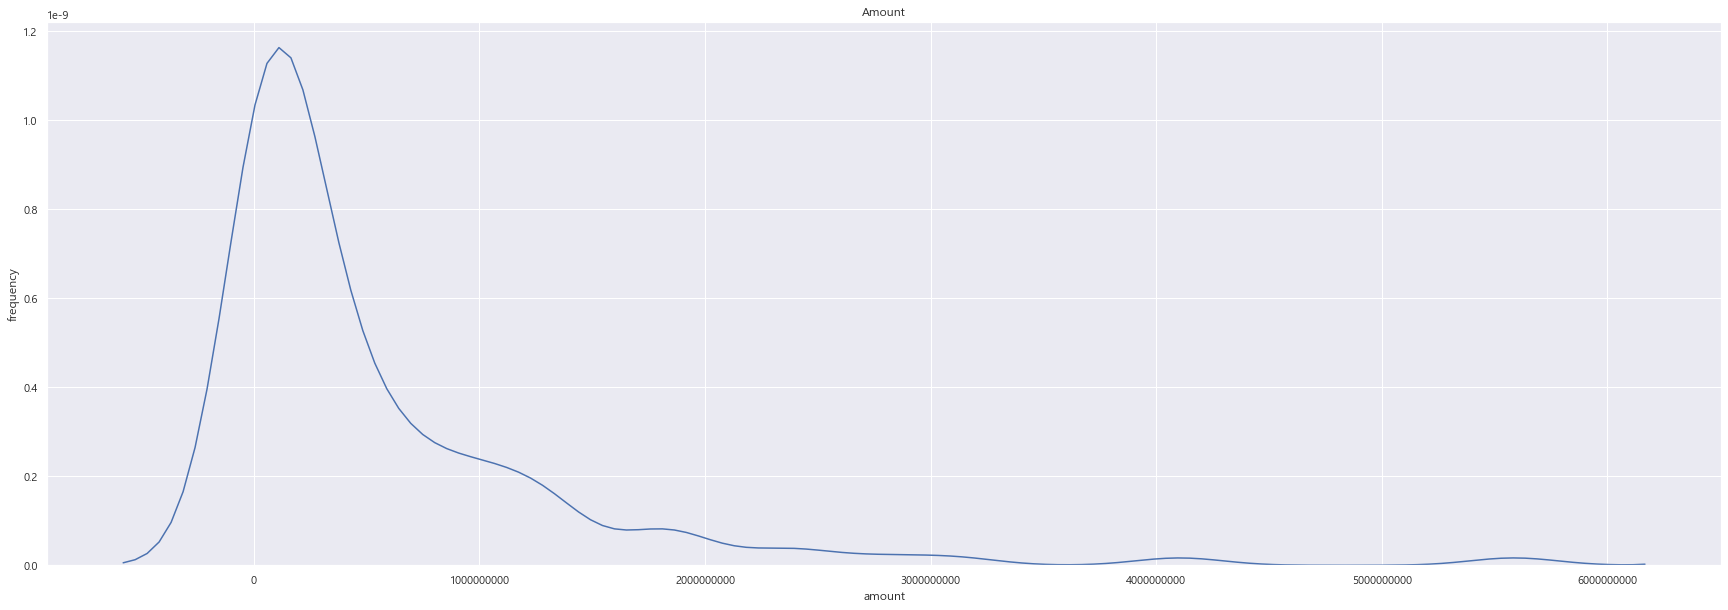

In [110]:
from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(30,10))
p = sns.distplot(new['amount'],kde=True,rug=False ,hist=False)
p.set_title('Amount')
p.set_xlabel('amount')
p.set_ylabel('frequency')
p.ticklabel_format(style='plain', axis='x',useOffset=False)

In [111]:
Q1 = np.percentile(new['amount'], 25)
Q1

58758479.14285684

In [112]:
Q3 = np.percentile (new['amount'], 75)
Q3

705470771.2857678

In [113]:
nums = new['amount']
low_range = (nums <= Q1)
new.loc[low_range, 'amount'] = 'low'
medium_range = (nums >Q1) & (nums <= Q3)
new.loc[medium_range, 'amount'] = 'medium'
high_range = (nums > Q3) 
new.loc[high_range, 'amount'] = 'high'

### 'precipitation(mm)' 열을 no rain 과 rain 2개의 범주형으로 변환

In [114]:
nums = new['precipitation(mm)']
low_range = (nums <= 10.0) 
new.loc[low_range,'precipitation(mm)'] = 'No rain'
medium_range = (nums > 10.0) 
new.loc[medium_range, 'precipitation(mm)'] = 'rain'

### 'average_temperature' 열을 very cold, cold, cool, hot, very hot 5개의 범주형으로 변환

In [115]:
nums = new['average_temperature']
매우추움범위 = (nums <= -5)
new.loc[매우추움범위, 'average_temperature'] = 'Very Cold'
추움범위 = (nums >= -5) & (nums < 15)
new.loc[추움범위, 'average_temperature'] = 'Cold'
선선범위 = (nums >= 15) & (nums < 25)
new.loc[선선범위, 'average_temperature'] = 'Cool'
더움범위 = (nums >= 25) & (nums < 30) 
new.loc[더움범위, 'average_temperature'] = 'Hot'
매우더움범위 = (nums >= 30)  
new.loc[매우더움범위, 'average_temperature'] = 'Very Hot'

### Apriori 적용

In [116]:
aaa = new.values.tolist()

In [117]:
te = TransactionEncoder()
te_ary = te.fit(aaa).transform(aaa)
te_ary.astype("int")

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1]])

### min_support 를 0.01로 설정

In [165]:
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.01,use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.491935,(Cold)
1,0.274194,(Cool)
2,0.233871,(Hot)
3,0.983871,(No rain)
4,0.250000,(high)
...,...,...
342,0.016129,"(Cool, low, No rain, 여행사업)"
343,0.129032,"(medium, 가을, Cool, No rain)"
344,0.064516,"(No rain, 여름, Hot, high)"
345,0.032258,"(No rain, low, 여름, Hot)"


### min_threshold 0.6으로 설정

In [166]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold = 0.6)

In [167]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cold),(No rain),0.491935,0.983871,0.491935,1.000000,1.016393,0.007934,inf
1,(겨울),(Cold),0.250000,0.491935,0.250000,1.000000,2.032787,0.127016,inf
2,(봄),(Cold),0.250000,0.491935,0.241935,0.967742,1.967213,0.118952,15.750000
3,(Cool),(No rain),0.274194,0.983871,0.266129,0.970588,0.986500,-0.003642,0.548387
4,(가을),(Cool),0.250000,0.274194,0.250000,1.000000,3.647059,0.181452,inf
...,...,...,...,...,...,...,...,...,...
407,"(medium, No rain, 여름)",(Hot),0.129032,0.233871,0.129032,1.000000,4.275862,0.098855,inf
408,"(medium, No rain, Hot)",(여름),0.129032,0.250000,0.129032,1.000000,4.000000,0.096774,inf
409,"(medium, 여름, Hot)",(No rain),0.129032,0.983871,0.129032,1.000000,1.016393,0.002081,inf
410,"(medium, 여름)","(No rain, Hot)",0.129032,0.225806,0.129032,1.000000,4.428571,0.099896,inf


### Consequents 가 high인 Rule 확인

In [168]:
rules[rules['consequents'] == {'high'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47,(미용업),(high),0.032258,0.25,0.032258,1.0,4.0,0.024194,inf
48,(소매업),(high),0.032258,0.25,0.032258,1.0,4.0,0.024194,inf
49,(외국음식),(high),0.032258,0.25,0.032258,1.0,4.0,0.024194,inf
50,(의류업),(high),0.032258,0.25,0.032258,1.0,4.0,0.024194,inf
51,(학원),(high),0.032258,0.25,0.032258,1.0,4.0,0.024194,inf
52,(한식음식점업),(high),0.032258,0.25,0.032258,1.0,4.0,0.024194,inf
117,"(미용업, Cold)",(high),0.016129,0.25,0.016129,1.0,4.0,0.012097,inf
119,"(소매업, Cold)",(high),0.016129,0.25,0.016129,1.0,4.0,0.012097,inf
120,"(외국음식, Cold)",(high),0.016129,0.25,0.016129,1.0,4.0,0.012097,inf
121,"(Cold, 의류업)",(high),0.016129,0.25,0.016129,1.0,4.0,0.012097,inf


그 결과 업종은 외국음식, 한국음식점업인 음식 관련 업종, 소매업, 의류업, 학원업과 날씨는 비가 오지 않으며, 평균기온 Cold (-5도에서 15도)일 때 amount가 high로 나타났다.
-5도에서 15도 사이의 기온은 늦가을에서 겨울로 추정할 수 있다.
따라서 이러한 분석결과들을 바탕으로 늦가을에서 겨울 시기에 음식 관련 업종, 소매업, 의류업, 학원업에 종사하는 사람들에게 금융기회를 제공 시 고려할 수 있는 요인으로 생각할 수 있다.


- 